In [2]:
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np
import seaborn as sns
sns.set_style("ticks")
sns.set_context({"figure.figsize": (24, 10)})

In [3]:
train = pd.read_csv('/home/fazle/Desktop/Innovation Lab/MindHunter/data/train.csv', parse_dates=['Dates'])
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 22:30:00,OTHER OFFENSES,MISCELLANEOUS INVESTIGATION,Wednesday,TARAVAL,NONE,0 Block of ESCOLTA WY,-122.487983,37.737667
2,2015-05-13 21:17:00,ROBBERY,"ROBBERY, BODILY FORCE",Wednesday,INGLESIDE,NONE,1600 Block of VALENCIA ST,-122.420272,37.747332
3,2015-05-13 20:50:00,NON-CRIMINAL,"CIVIL SIDEWALKS, CITATION",Wednesday,MISSION,"ARREST, BOOKED",400 Block of CASTRO ST,-122.435150,37.761760
4,2015-05-13 20:15:00,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Wednesday,SOUTHERN,NONE,1600 Block of MARKET ST,-122.422128,37.773033


In [4]:
test = pd.read_csv('/home/fazle/Desktop/Innovation Lab/MindHunter/data/test.csv', parse_dates=['Dates'])
test.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138
2,2015-05-13 22:30:00,OTHER OFFENSES,MISCELLANEOUS INVESTIGATION,Wednesday,TARAVAL,NONE,0 Block of ESCOLTA WY,-122.487983,37.737667
3,2015-05-13 22:00:00,ROBBERY,"ROBBERY, ARMED WITH A KNIFE",Wednesday,TENDERLOIN,NONE,EDDY ST / JONES ST,-122.412597,37.783932
4,2015-05-13 21:17:00,ROBBERY,"ROBBERY, BODILY FORCE",Wednesday,INGLESIDE,NONE,1600 Block of VALENCIA ST,-122.420272,37.747332


In [7]:
crime_count=train.groupby(['Category','PdDistrict']).size()
crime_count.head(20)

Category  PdDistrict
ARSON     BAYVIEW         42
          CENTRAL         14
          INGLESIDE       28
          MISSION         15
          NORTHERN         9
          PARK             9
          RICHMOND        12
          SOUTHERN        20
          TARAVAL         11
          TENDERLOIN       6
ASSAULT   BAYVIEW        969
          CENTRAL        707
          INGLESIDE      868
          MISSION       1066
          NORTHERN       819
          PARK           358
          RICHMOND       329
          SOUTHERN      1213
          TARAVAL        561
          TENDERLOIN     792
dtype: int64

In [8]:
summary=pd.DataFrame({'count':crime_count}).reset_index()
summary.head(20)

,Category,PdDistrict,count
0,ARSON,BAYVIEW,42
1,ARSON,CENTRAL,14
2,ARSON,INGLESIDE,28
3,ARSON,MISSION,15
4,ARSON,NORTHERN,9
5,ARSON,PARK,9
6,ARSON,RICHMOND,12
7,ARSON,SOUTHERN,20
8,ARSON,TARAVAL,11
9,ARSON,TENDERLOIN,6


In [9]:
category_count=summary.groupby('Category').sum().reset_index()
top=category_count.sort_values('count', ascending=False)
top15=top[0:15]
topCrime=summary[summary['Category'].isin(top15['Category'])]
topCrime.head()

,Category,PdDistrict,count
10,ASSAULT,BAYVIEW,969
11,ASSAULT,CENTRAL,707
12,ASSAULT,INGLESIDE,868
13,ASSAULT,MISSION,1066
14,ASSAULT,NORTHERN,819


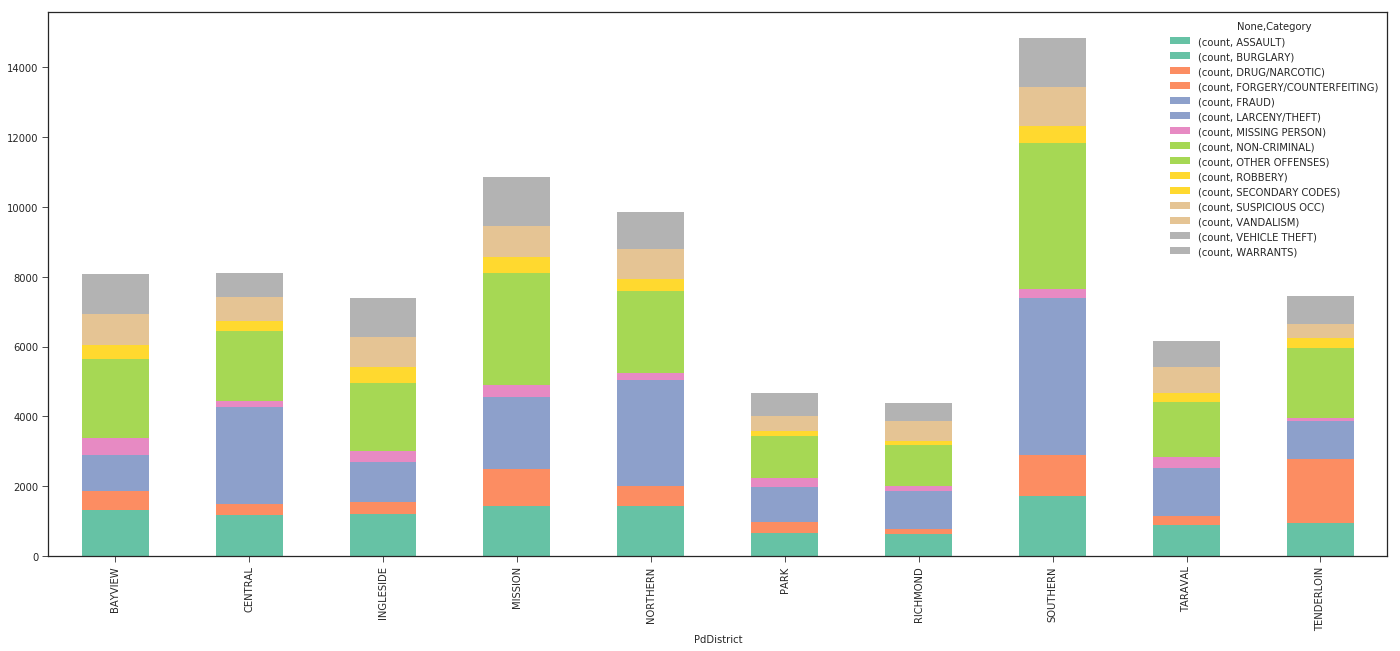

In [51]:
pivotPlot=topCrime.pivot(index='PdDistrict', columns='Category')
p1=pivotPlot.plot(kind='bar', stacked=True, colormap='Set2')

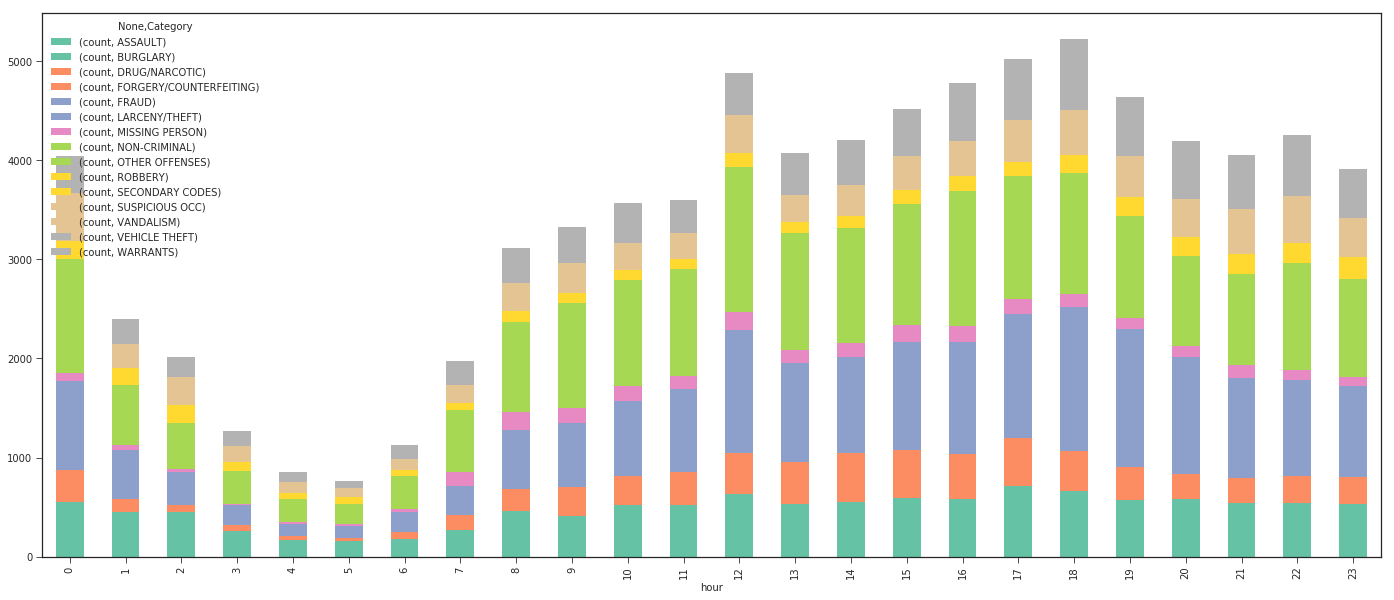

In [50]:
train['hour']=train.Dates.dt.hour
topCrime2=train[train['Category'].isin(top15['Category'])]
category_count2=topCrime2.groupby(['Category','hour']).size()
category_count2=pd.DataFrame({'count':category_count2}).reset_index()
pivotPlot2=category_count2.pivot(index='hour',columns="Category")
p2=pivotPlot2.plot(kind='bar', stacked=True, colormap='Set2')

In [47]:
crime_count=train.groupby(['Category']).size()
crime_count.head(50)
#crime_count=crime_count.sort_values(ascending=False)
#p1=crime_count.plot(kind='bar', stacked=True, color='white')

Category
ARSON                            166
ASSAULT                         7682
BAD CHECKS                        50
BRIBERY                           30
BURGLARY                        3729
DISORDERLY CONDUCT               441
DRIVING UNDER THE INFLUENCE      204
DRUG/NARCOTIC                   5480
DRUNKENNESS                      438
EMBEZZLEMENT                     107
EXTORTION                         20
FAMILY OFFENSES                   55
FORGERY/COUNTERFEITING          1083
FRAUD                           1587
GAMBLING                          17
KIDNAPPING                       263
LARCENY/THEFT                  17531
LIQUOR LAWS                      184
LOITERING                        119
MISSING PERSON                  2609
NON-CRIMINAL                    9341
OTHER OFFENSES                 12515
PORNOGRAPHY/OBSCENE MAT            4
PROSTITUTION                     764
RECOVERED VEHICLE                315
ROBBERY                         2321
RUNAWAY                      

In [3]:
test = pd.read_csv('/home/fazle/Desktop/Innovation Lab/CS299_13_43/Source FIles - MindHunter/data/test.csv', index_col=False)

In [31]:
latitude = -122.487983072777
T = test['X'].values
x = 0
print (T[2]==latitude)
for i in (1, 175609):
        if latitude == T[i]:
            x = i
print (x)

True
0
